## MODEL BUILDING - FROM PREPROCESSED

In [19]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [20]:
df = pd.read_csv('ex1.csv')

In [21]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [22]:
df['Blood Test Date']=pd.to_datetime(df['Blood Test Date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Age                      20 non-null     int64         
 1   Gender                   20 non-null     int64         
 2   Height (cm)              20 non-null     int64         
 3   Weight (kg)              20 non-null     int64         
 4   BMI                      20 non-null     float64       
 5   Physical Activity Level  20 non-null     int64         
 6   Dietary Habits           20 non-null     int64         
 7   Sleep Patterns           20 non-null     int64         
 8   Stress Level             20 non-null     int64         
 9   Past Surgeries           20 non-null     int64         
 10  Chronic Conditions       20 non-null     int64         
 11  Allergies                20 non-null     int64         
 12  Alcohol Consumption      20 non-null  

In [24]:
## Spliting Data


x= df.drop(['Risk Score','Blood Test Date'],axis=1)

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     int64  
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     int64  
 6   Dietary Habits           20 non-null     int64  
 7   Sleep Patterns           20 non-null     int64  
 8   Stress Level             20 non-null     int64  
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       20 non-null     int64  
 11  Allergies                20 non-null     int64  
 12  Alcohol Consumption      20 non-null     int64  
 13  Tobacco Use              20 non-null     int64  
 14  Glucose (mg/dL)          20 

In [26]:
y=df['Risk Score']

## Splitting into Train and Test

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [43]:
x_test.shape,x_train.shape

((4, 19), (16, 19))

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import numpy as np
def show_scores(model, x_train, x_test, y_train, y_test):
  # Calculate the model's predictions
  train_preds = model.predict(x_train)
  test_preds = model.predict(x_test)

  # Evaluate the model's performance using various metrics
  mae_train = mean_absolute_error(y_train, train_preds)
  mae_test = mean_absolute_error(y_test, test_preds)
  mse_train = mean_squared_error(y_train, train_preds)
  mse_test = mean_squared_error(y_test, test_preds)
  r2_train = r2_score(y_train, train_preds)
  r2_test = r2_score(y_test, test_preds)

  # Print the results
  print("Model:", model.__class__.__name__)
  print("-" * 30)
  print("Training set:")
  print("- RMSE:", np.sqrt(mse_train))
  print("- MAE:", mae_train)
  print("- R2 Score:", r2_train)
  print("-" * 30)
  print("Test set:")
  print("- RMSE:", np.sqrt(mse_test))
  print("- MAE:", mae_test)
  print("- R2 Score:", r2_test)

In [45]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
# ElasticNet
from sklearn.linear_model import ElasticNet
en = ElasticNet()

In [46]:
models = [xgb, rf, dt, lr, lasso, ridge, en]
model_names = [model.__class__.__name__ for model in models]
for model in models:
    model.fit(x_train, y_train)
    show_scores(model, x_train, x_test, y_train, y_test)
    print("\n")

Model: XGBRegressor
------------------------------
Training set:
- RMSE: 0.0005017446853493168
- MAE: 0.0003885820508003346
- R2 Score: 0.9999921020320227
------------------------------
Test set:
- RMSE: 0.20346717797181837
- MAE: 0.16837383806705475
- R2 Score: 0.33761771981095023


Model: RandomForestRegressor
------------------------------
Training set:
- RMSE: 0.06596732145539949
- MAE: 0.05481249999999995
- R2 Score: 0.863476470588235
------------------------------
Test set:
- RMSE: 0.21709675262426187
- MAE: 0.20899999999999996
- R2 Score: 0.24590400000000068


Model: DecisionTreeRegressor
------------------------------
Training set:
- RMSE: 0.0
- MAE: 0.0
- R2 Score: 1.0
------------------------------
Test set:
- RMSE: 0.18027756377319948
- MAE: 0.125
- R2 Score: 0.48


Model: LinearRegression
------------------------------
Training set:
- RMSE: 3.2425355437371536e-15
- MAE: 2.4980018054066022e-15
- R2 Score: 1.0
------------------------------
Test set:
- RMSE: 0.343418128451133

In [55]:
x_train.head(1)

,Age,Gender,Height (cm),Weight (kg),BMI,Physical Activity Level,Dietary Habits,Sleep Patterns,Stress Level,Past Surgeries,Chronic Conditions,Allergies,Alcohol Consumption,Tobacco Use,Glucose (mg/dL),Heart Rate (bpm),Temperature (°C),Blood Pressure (mm),Blood Pressure (Hg)
8,49,0,152,68,29.4,0,2,8,1,1,2,1,1,1,143,77,37.2,120,80


In [60]:
xgb.predict(pd.DataFrame({'Age':18,'Gender':1,'Height (cm)':170,'Weight (kg)':65,'BMI':29.4,'Physical Activity Level':0,'Dietary Habits':1,'Sleep Patterns':6,'Stress Level':1,'Past Surgeries':0,'Chronic Conditions':0,'Allergies':0,'Alcohol Consumption':2,'Tobacco Use':0,'Glucose (mg/dL)':150,'Heart Rate (bpm)':72,'Temperature (°C)':37.4,'Blood Pressure (mm)':110,'Blood Pressure (Hg)':75},index=[0]))

array([0.5058839], dtype=float32)

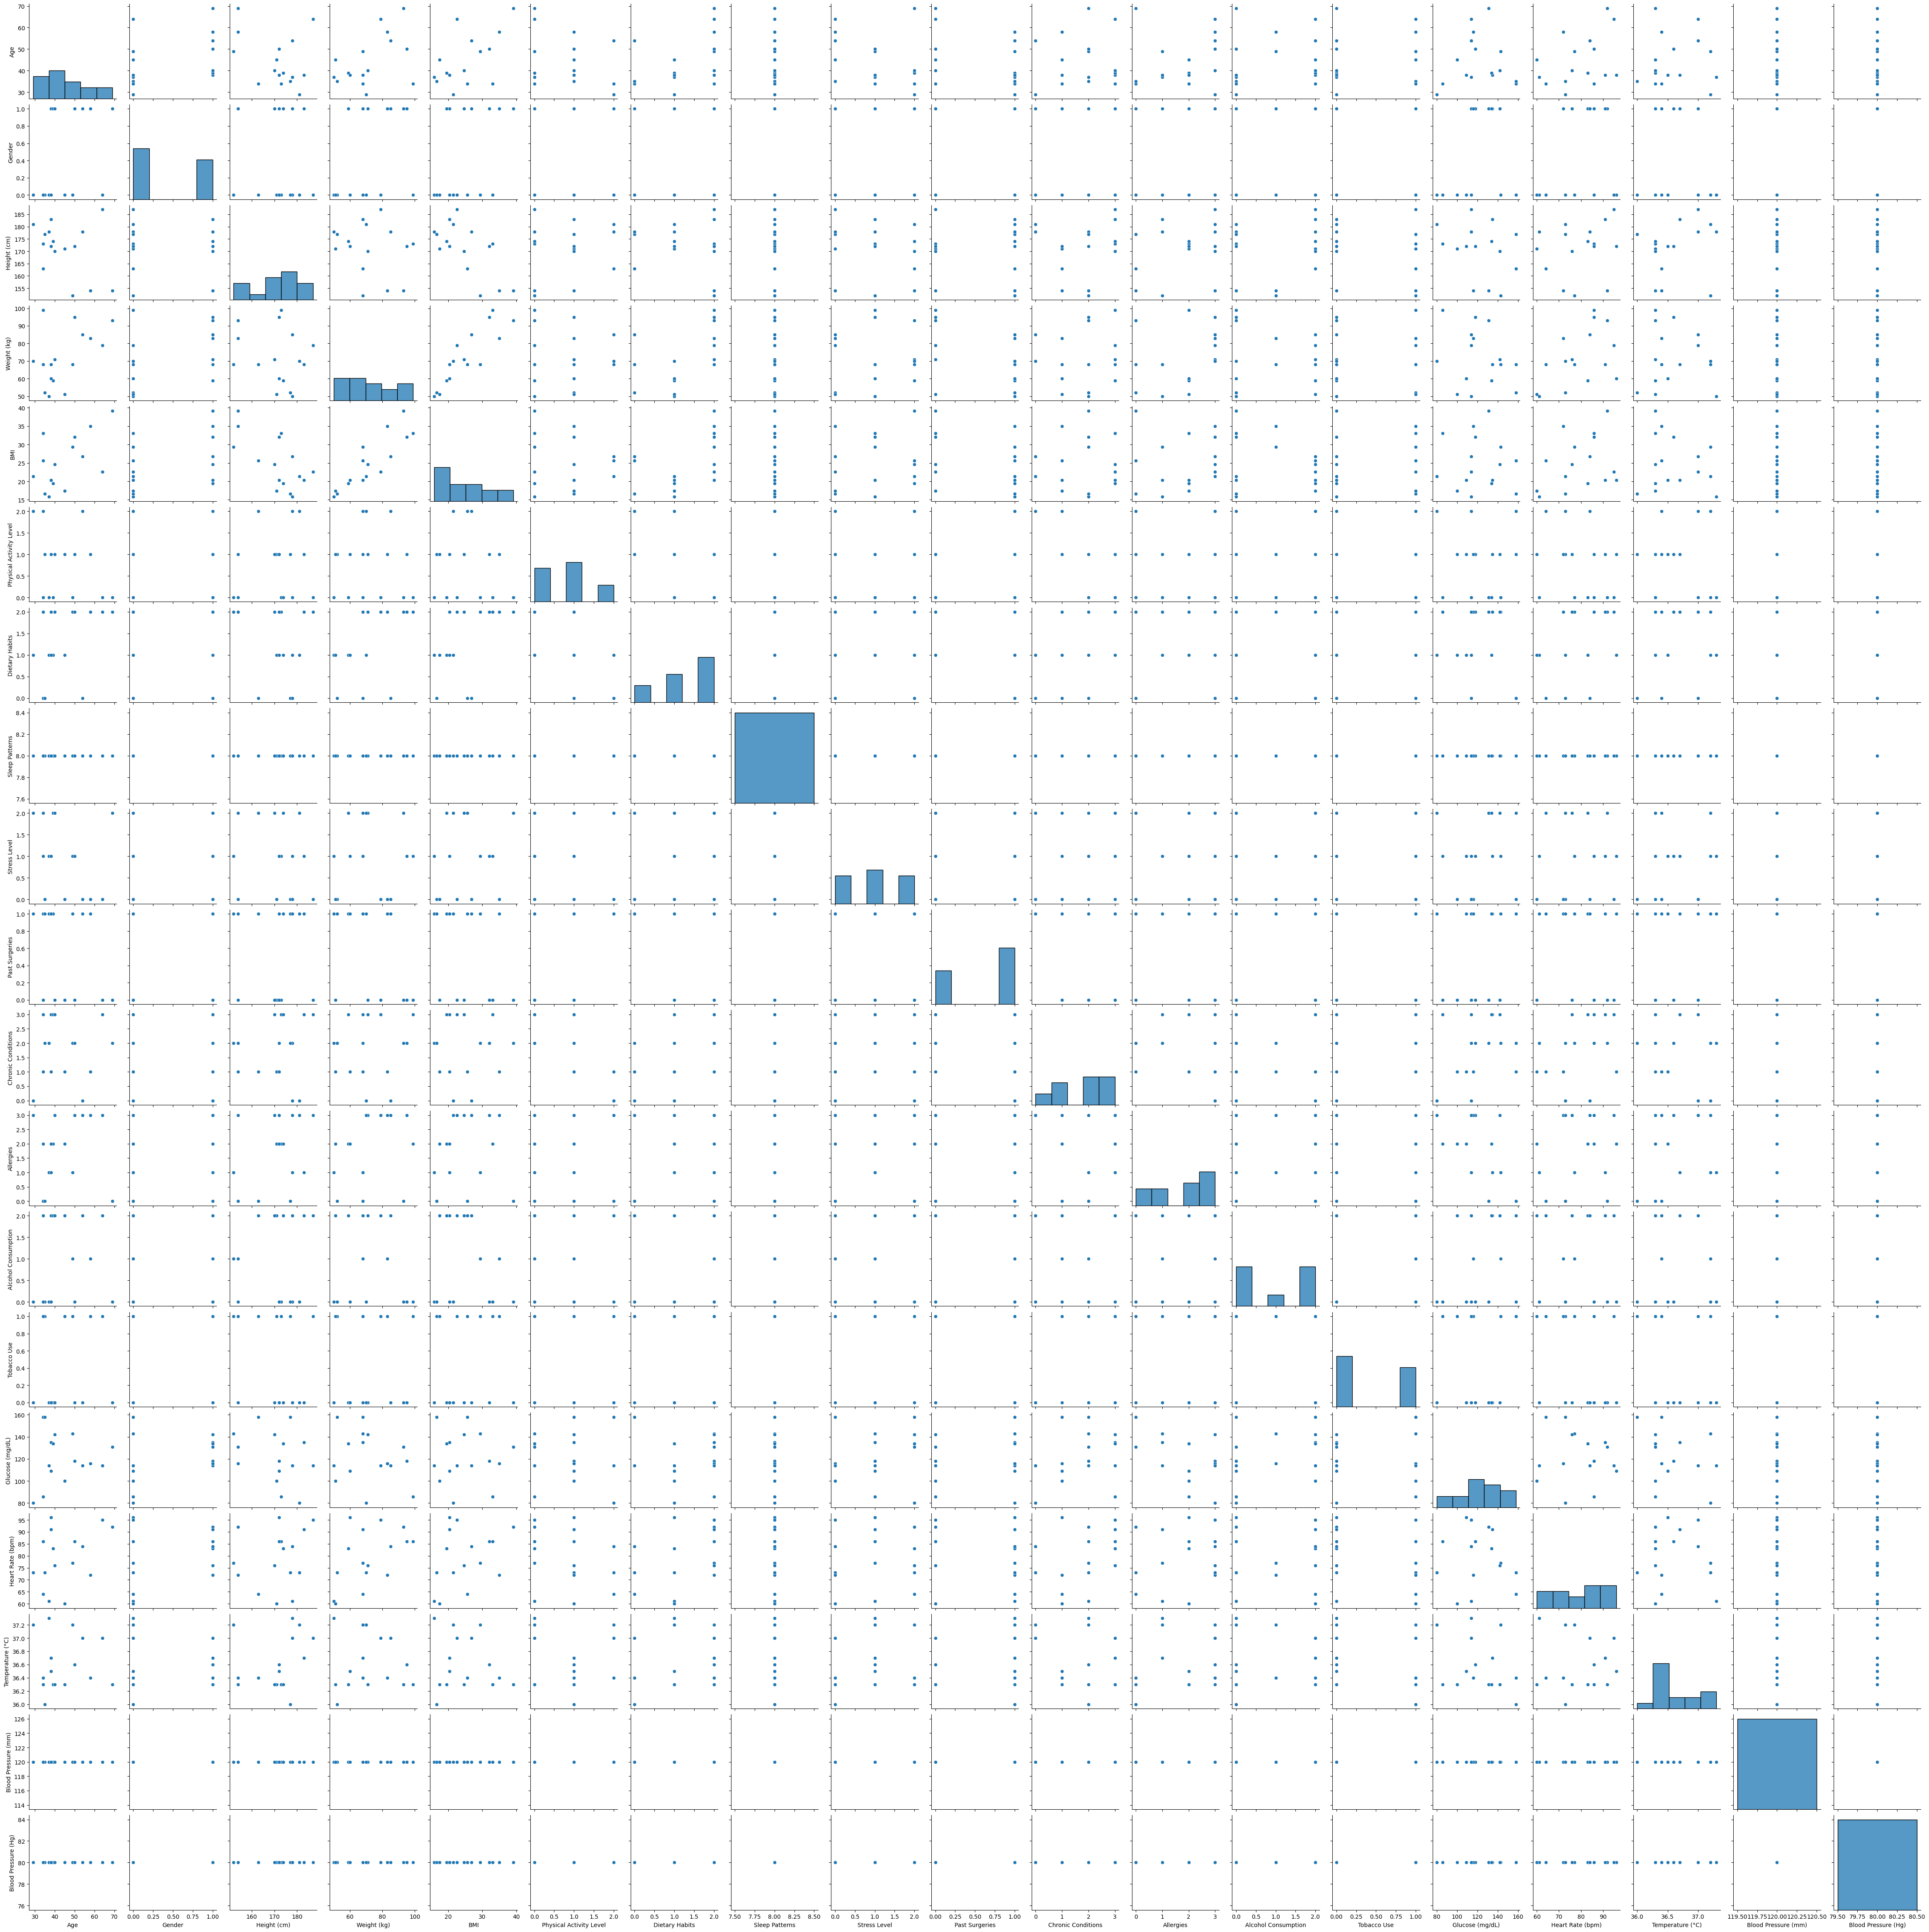

In [61]:
sns.pairplot(x_train)

<Axes: >

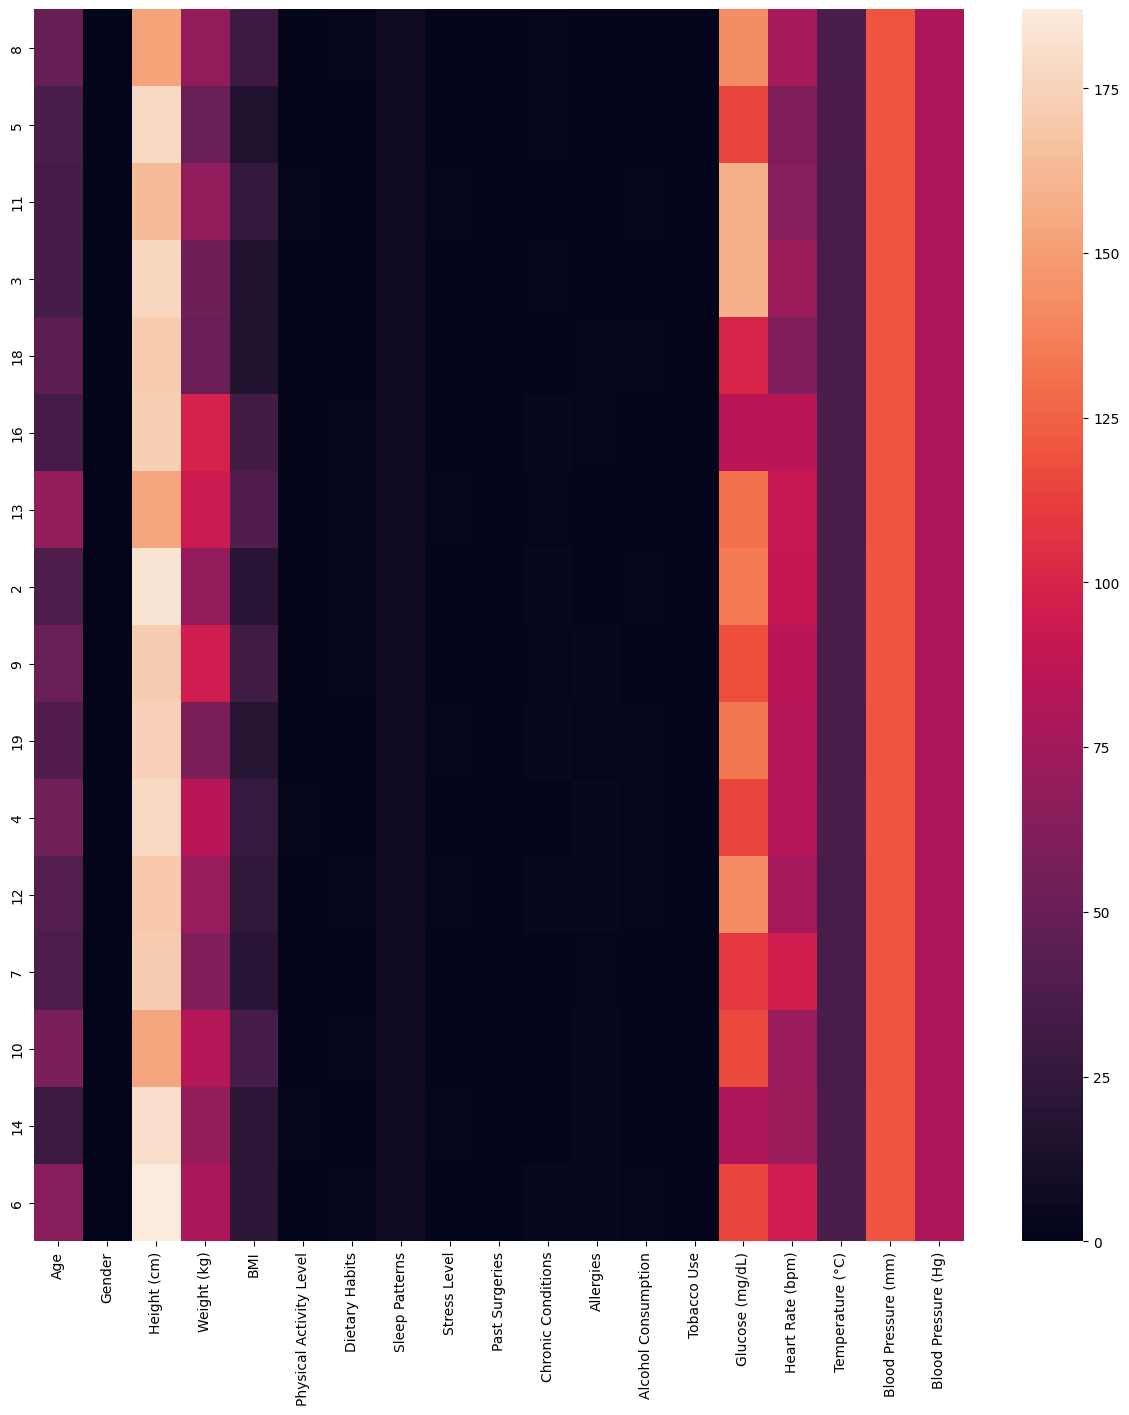

In [64]:
plt.figure(figsize=(15,16))
sns.heatmap(x_train)

In [65]:
# Best model is XGBoost Regressor
# Save the model
import joblib
joblib.dump(xgb, "NxtGenHealth")

['NxtGenHealth']

In [66]:
xgb.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)>